In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)


1 spectrum  in use
 
Spectral Data File: P0886040701PNS003SRSPEC0008.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.372e-03 +/- 7.054e-04 (39.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-12
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.243e+04 sec
 Using fit statistic: chi
 Using Background File                P0886040701PNS003BGSPEC0008.FTZ
  Background Exposure Time: 2.243e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY9.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886040701PNS003SRCARF0008.FTZ



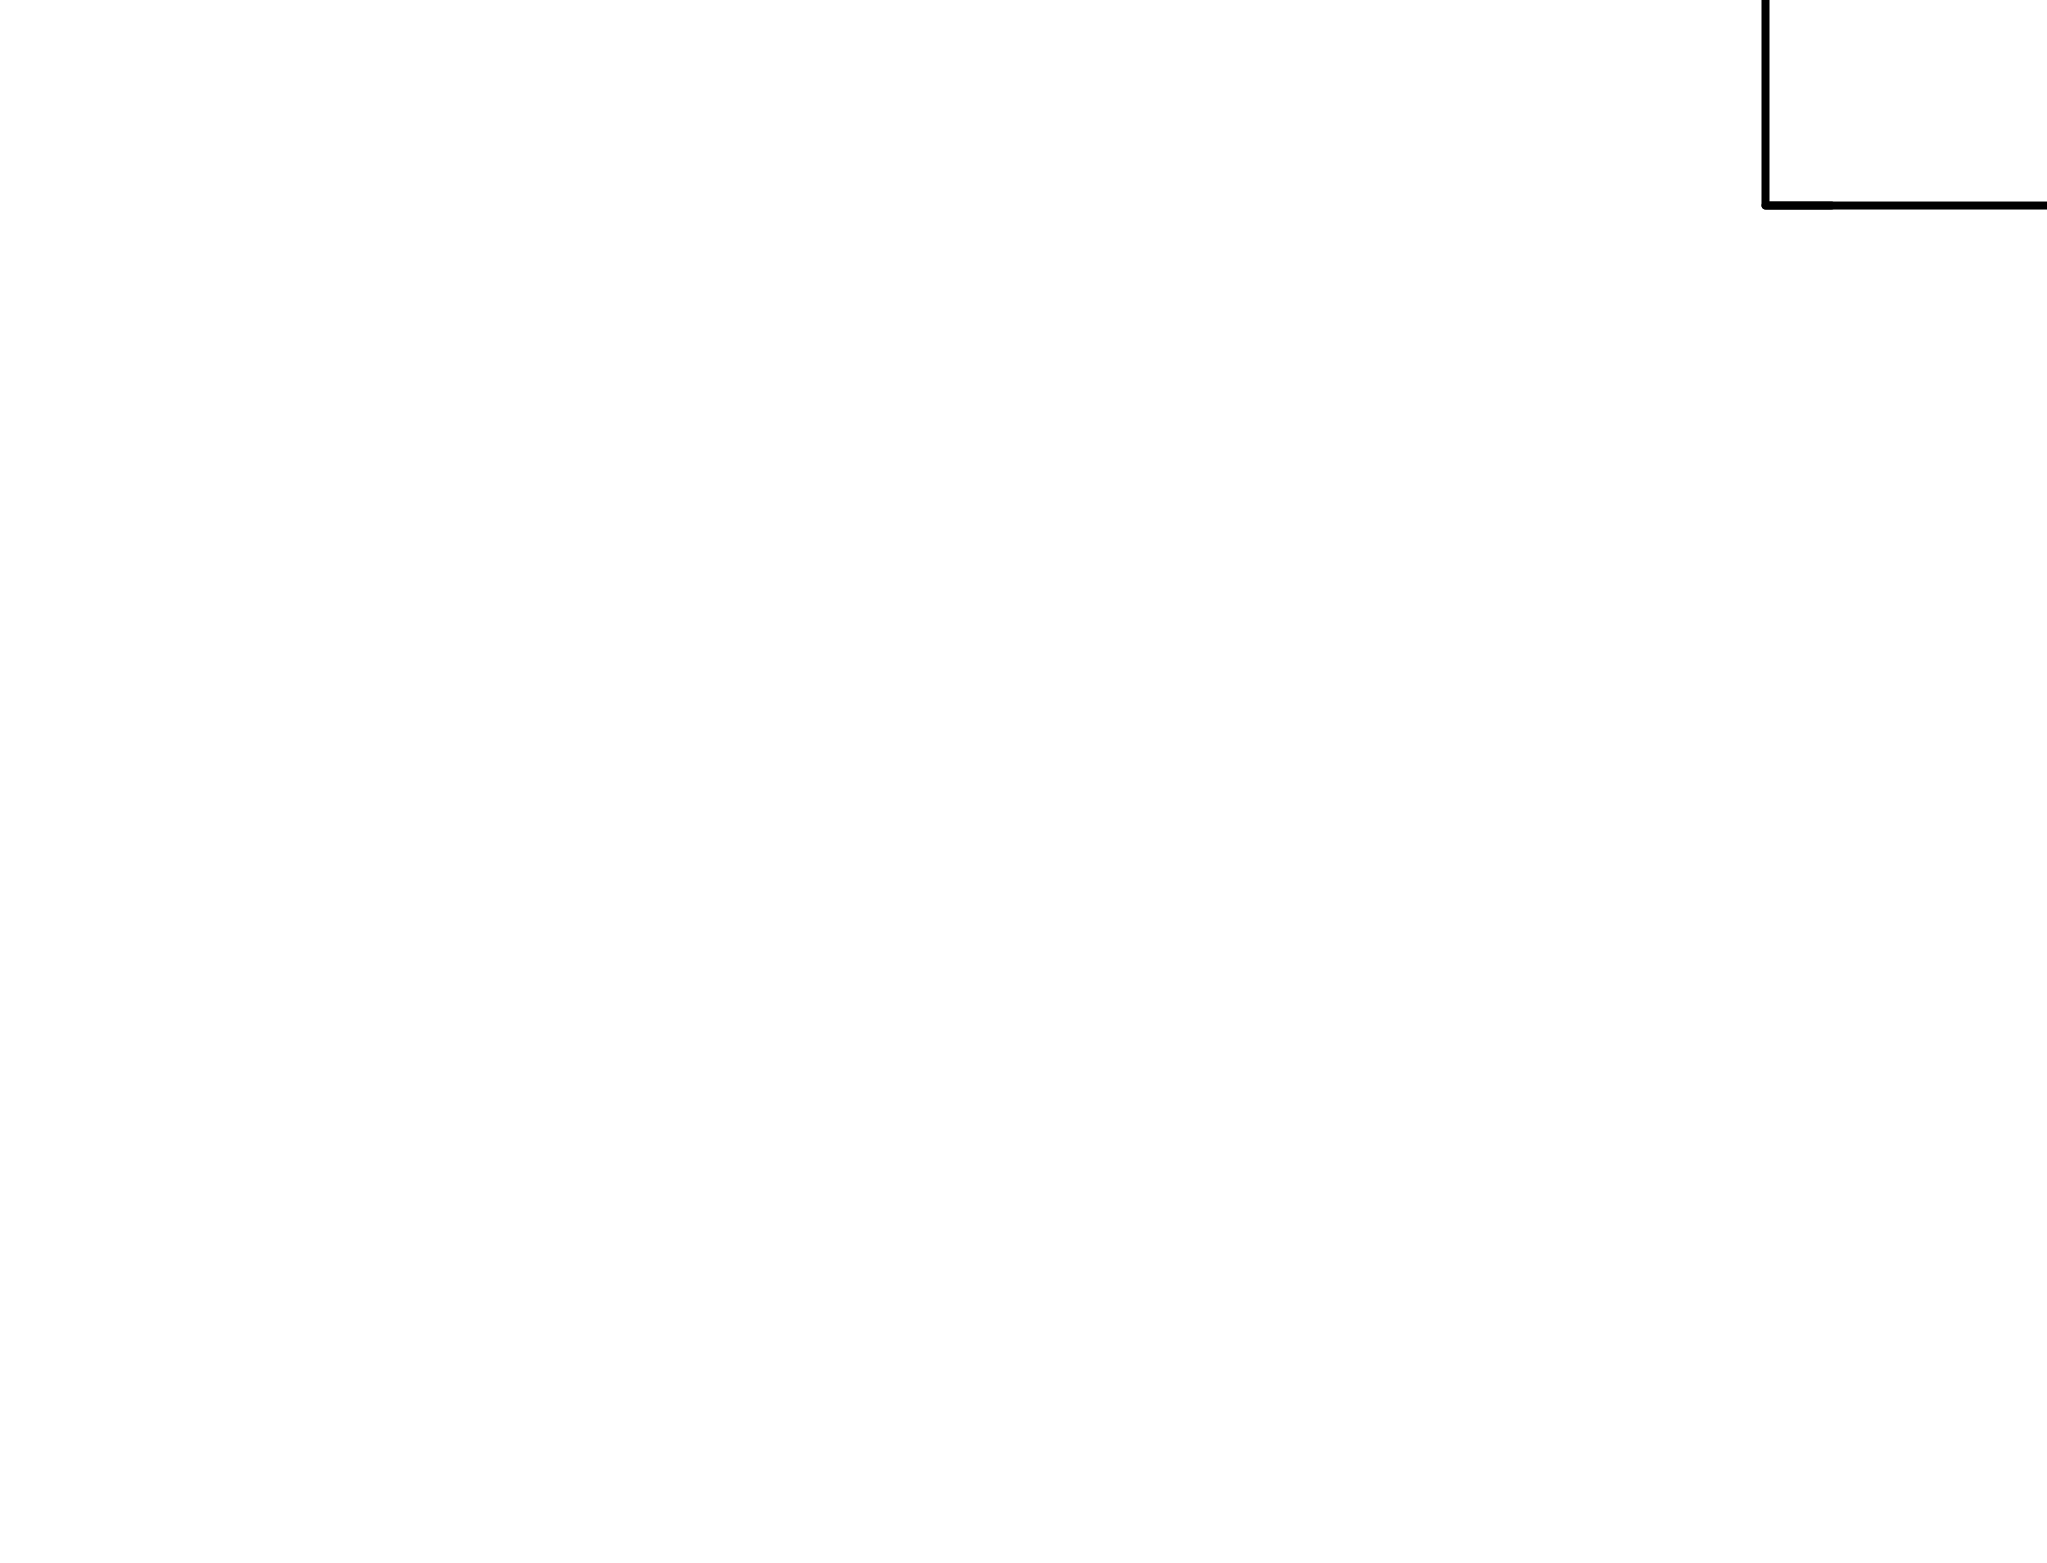

In [3]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (12) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

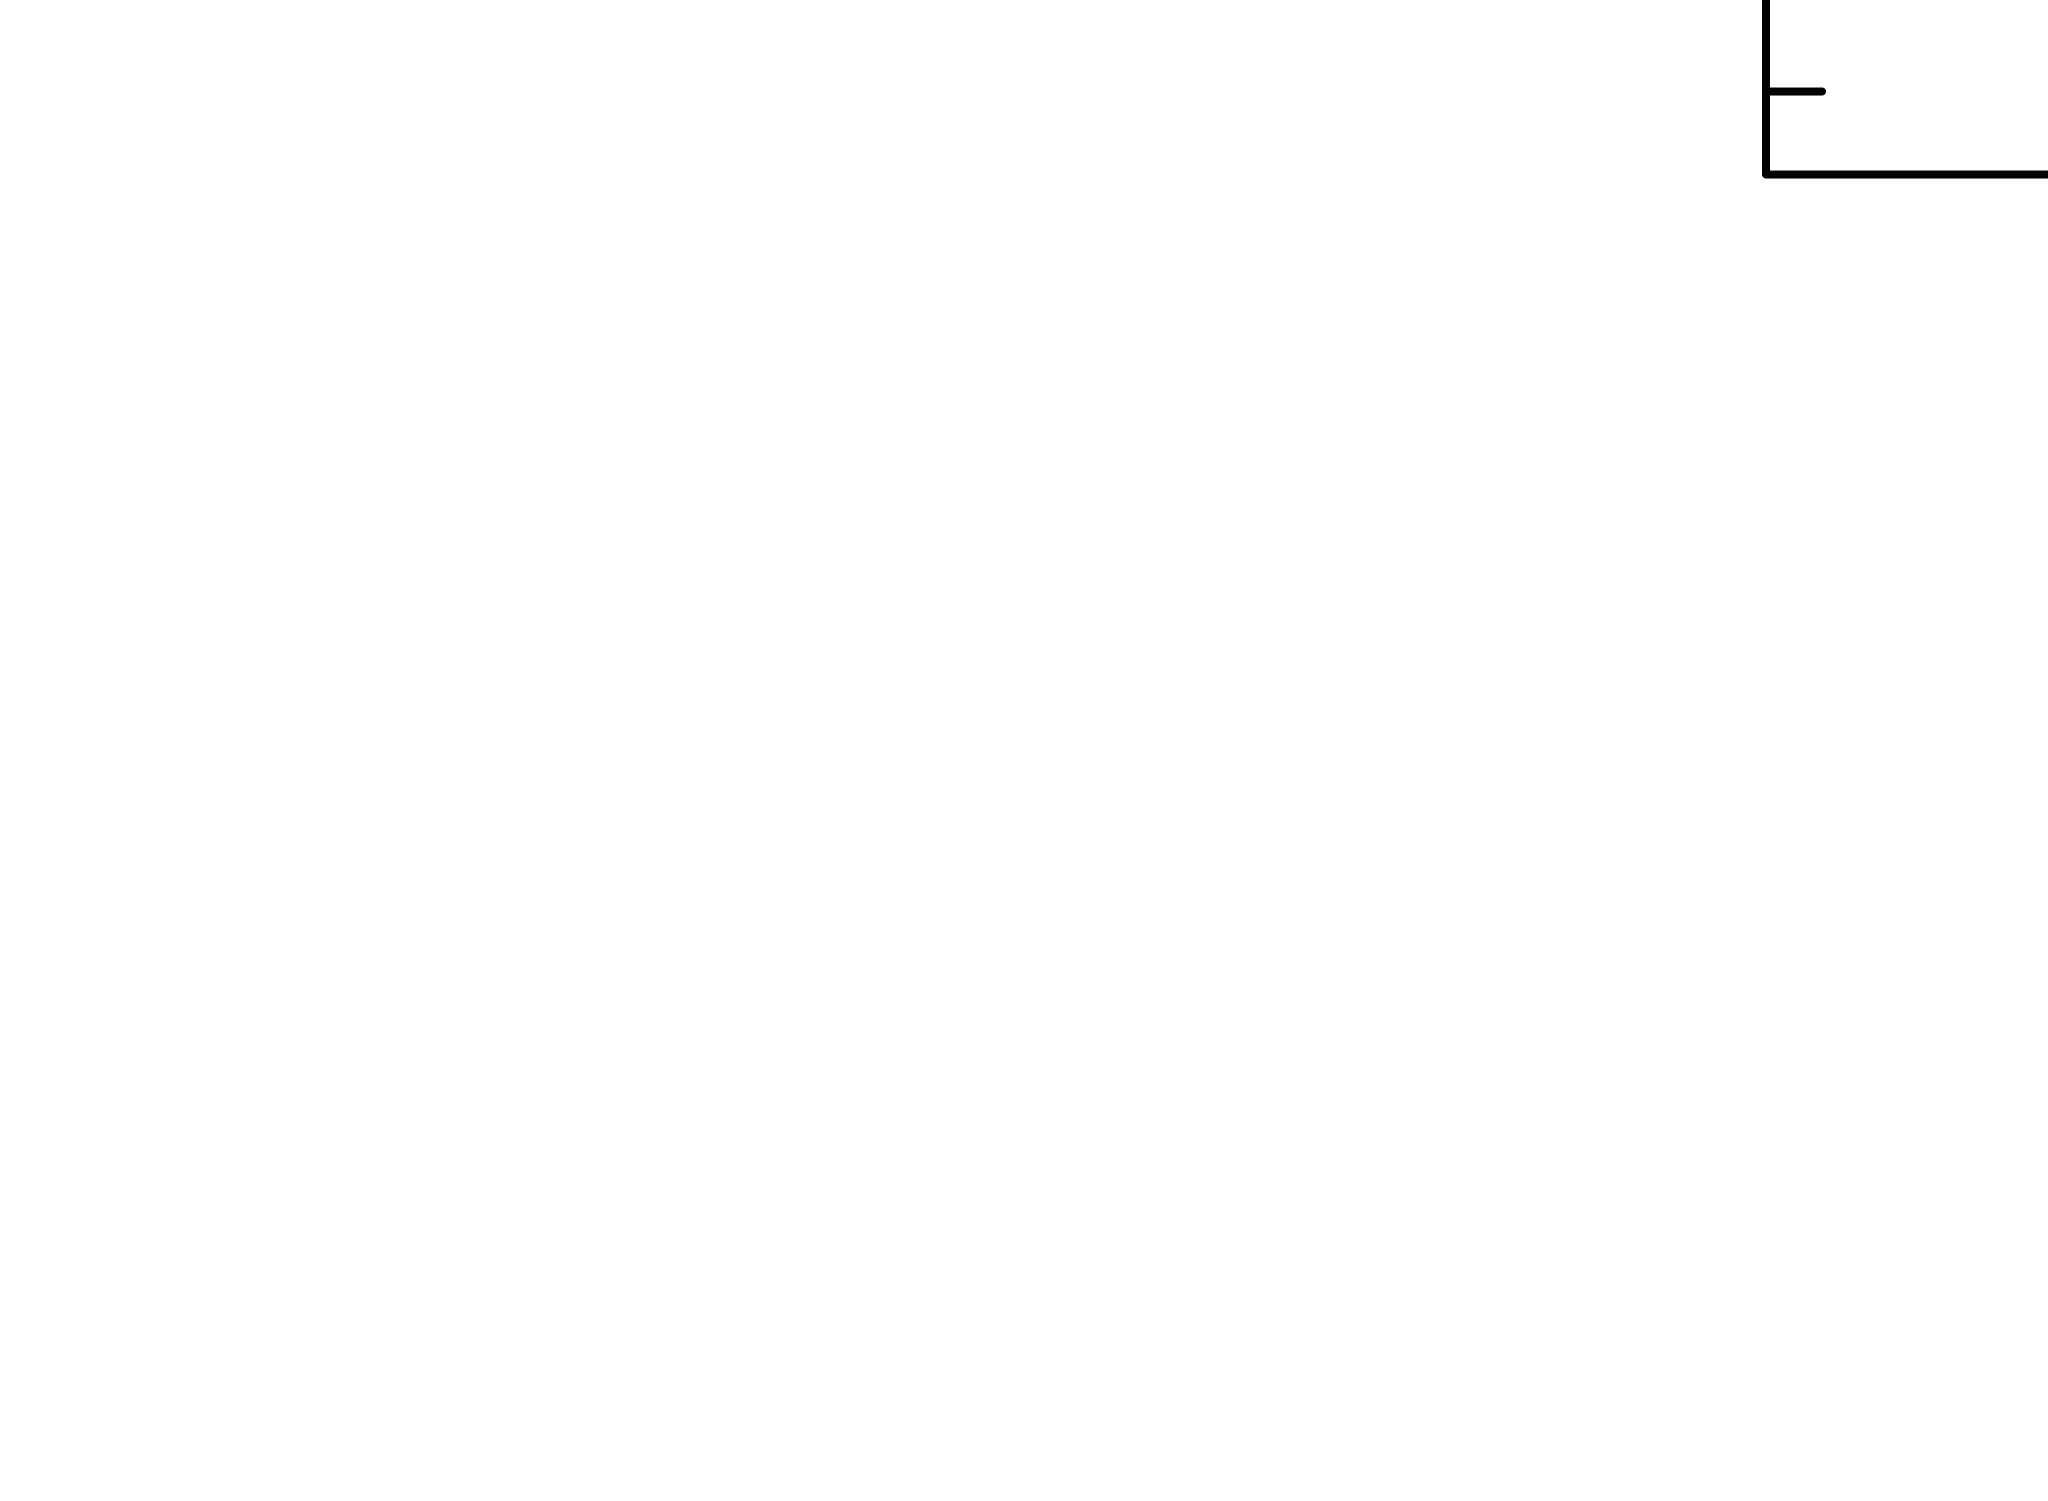

In [4]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1      3.86585      28.2228    (-7.5048,16.8521)
 Parameter   Confidence Range (2.706)
     2     0.520703      1.69693    (-0.400021,0.776202)


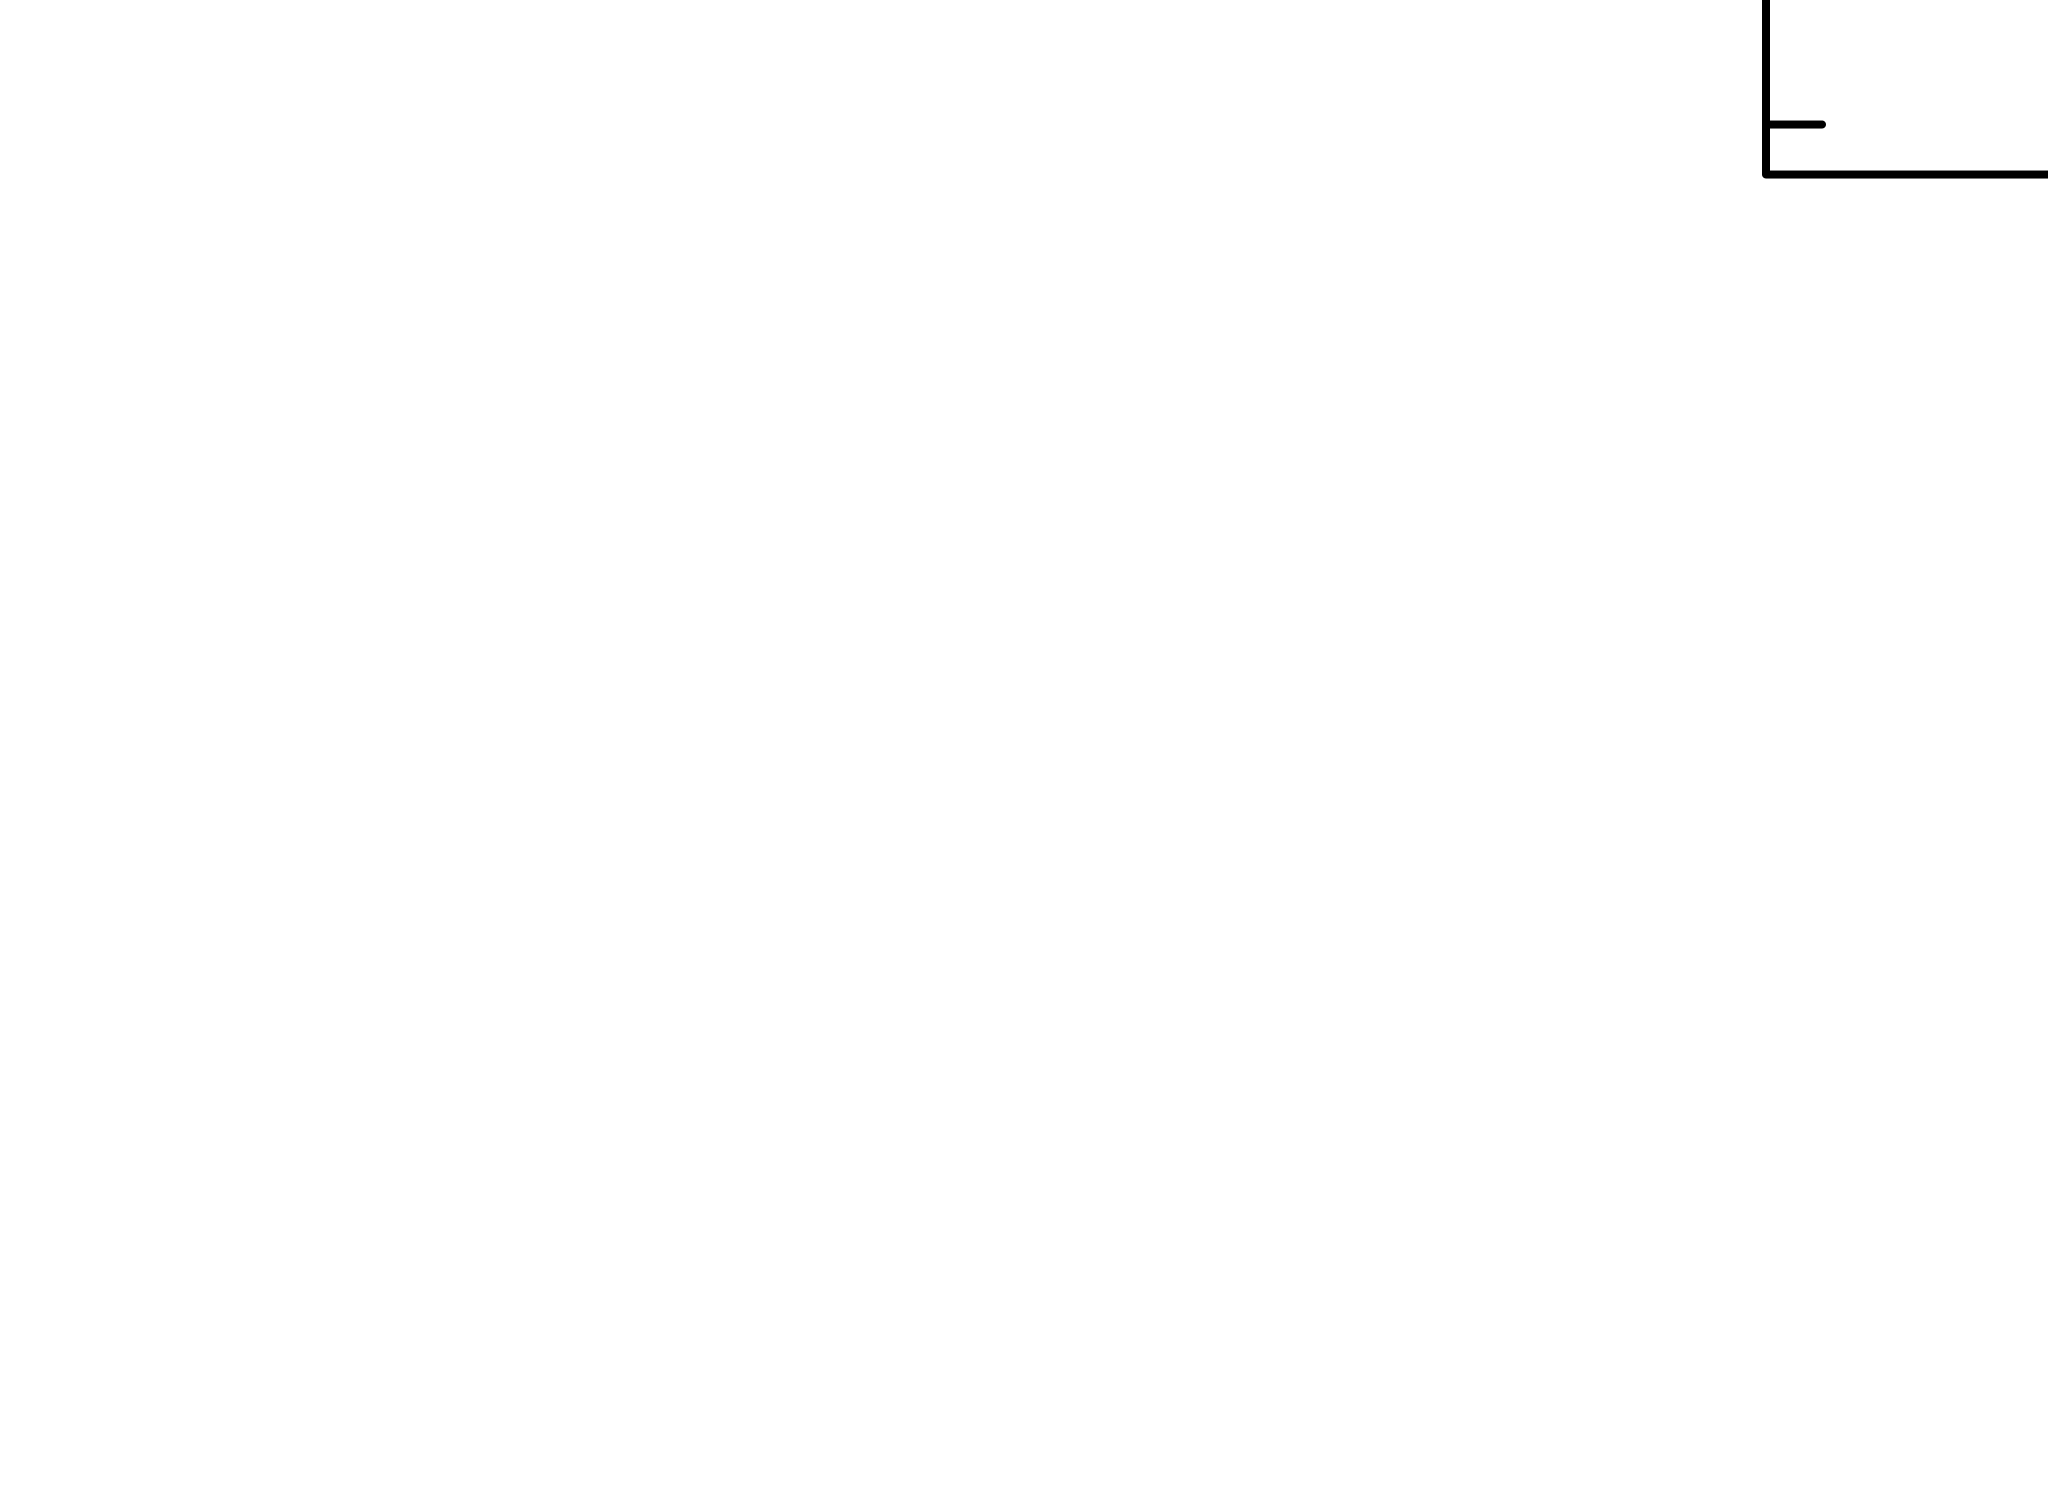


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.574447e+11     using 11 bins.

Test statistic : Chi-Squared              2.574447e+11     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
38.4335      1.35364       0       1.48090       37.1512   5.05414e-06
24.1479      301827       -1       6.04996       199.000   2.12140e-05
10.2426      155715       -1       7.75755       11.5834   3.48401e-05
9

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1      6.55829      32.1971    (-8.34691,17.2919)
 Parameter   Confidence Range (2.706)
     2     0.777499      31.3268    (-1.32533,29.224)



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              9.723217e+10     using 11 bins.

Test statistic : Chi-Squared              9.723217e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
50.5502      0.0644421    -3      0.359390       32.9617   3

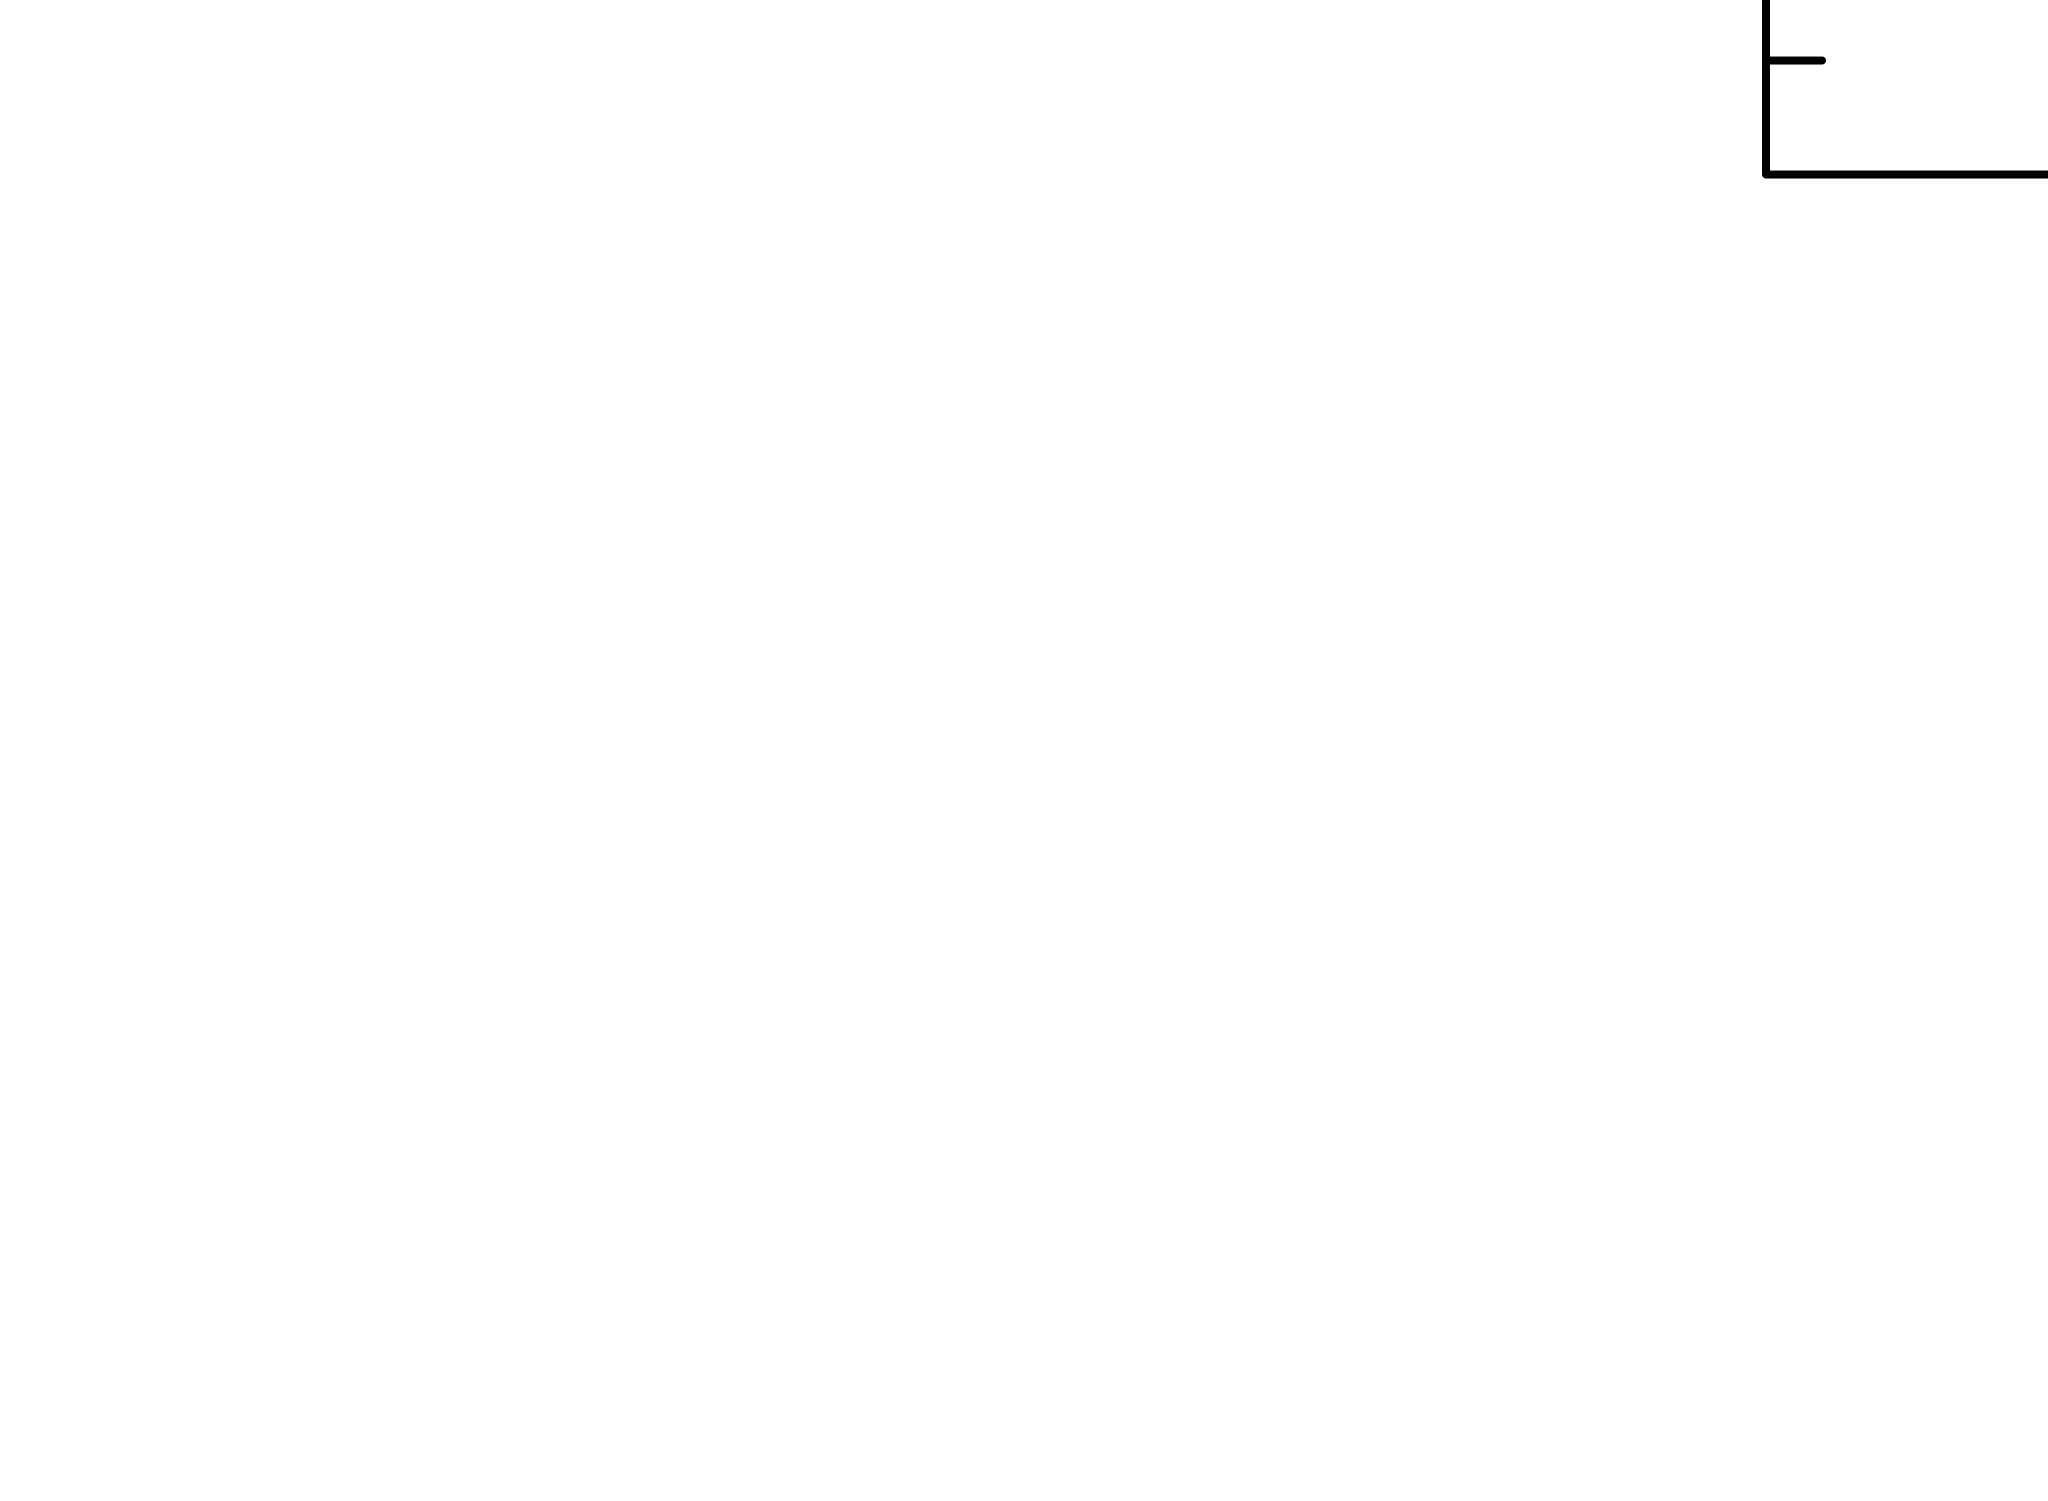

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1      4.62153      11.8369    (-2.76029,4.45512)
 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
8.74717      0.146415     -1       10.0458       2.97126   0.000227474
8.36432      3114.82      -1       10.7305       2.71387   0.000267565
8.06204      2115.06      -1       11.3027       2.51452   0.000308592
7.82166      1492.25      -1       11.8498       2.35425   0.000351108
7.62125      1179.81      -1       12.3563       2.22964   0.000394611
7.4448       894.634      -1       12.8347       2.12209   0.000440204
7.28991      730.564      -1       13.2854       2.03345   0.000486986
7.16372      575.946      -1       13.6949       1.96107   0.000533187
7.0387       447.979      -1       14.1077       1.88920   0.000583989
6.91778      433.98       -1       14.4999       1.82673   0.000637732
6.805        365.24       -1       14.9112


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.204456e+12     using 11 bins.

Test statistic : Chi-Squared              1.204456e+12     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
21.6554      3.58816      -3       1.13077     -0.932904   2.74053e-07
20.6656      4.23088e+06  -1      0.194547     -0.770308   3.73226e-07
19.5562      1.61768e+06  -1      0.770662     -0.662358   4.74820e-07

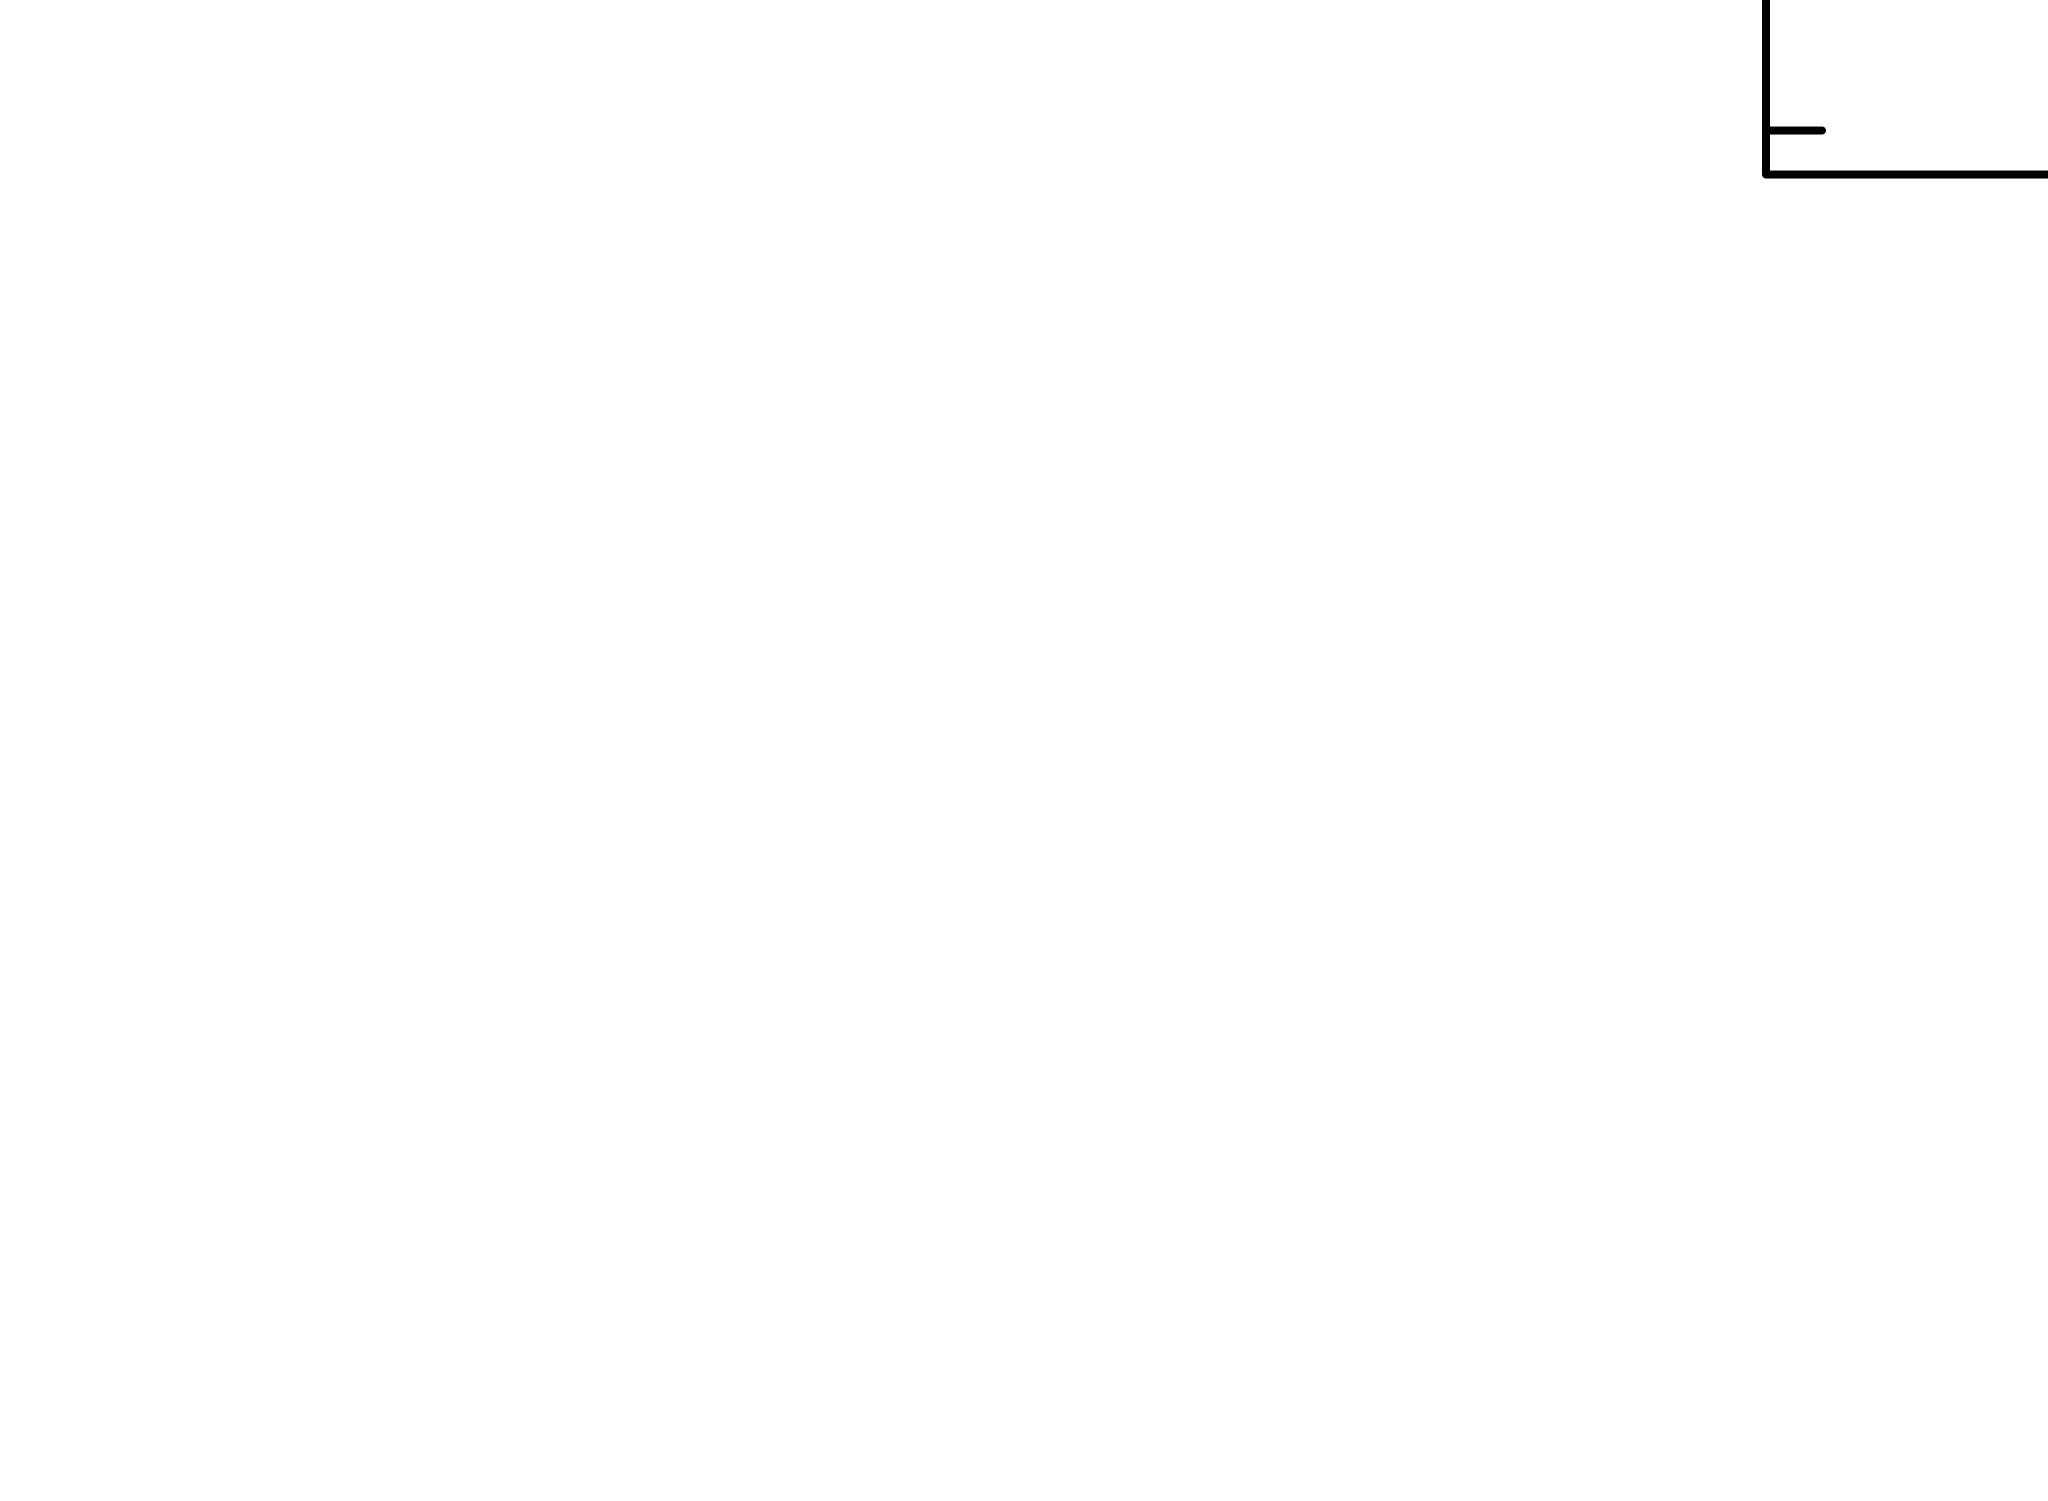

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1      7.33051      42.5527    (-11.8354,23.3868)
 Parameter   Confidence Range (2.706)
     2      1.57525      8.84837    (-2.69467,4.57845)


In [12]:
np.savetxt('../spec19_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.0082e-05 photons (8.0478e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
#plx = 0.1944
d_kpc = 8
F_x = 8.0482*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

6.1611277941198844e+32


In [15]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
32.78966021702348


In [16]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.16450946111422177
